P4

In [1]:
import pandas as pd
import numpy as np
from pandas.core.common import flatten
from plotnine import *
from array import *
import scipy.stats as stats
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


In [4]:
X = {'volumen' : [890, 805, 1001, 1525, 39, 701, 641, 1028, 1492, 519, 1110, 505, 834, 944, 920, 1350],
     'tapas': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]}
X = pd.DataFrame(X, columns = ['volumen', 'tapas'])
volumen = [890, 805, 1001, 1525, 39, 701, 641, 1028, 1492, 519, 1110, 505, 834, 944, 920, 1350]
peso = [849, 850, 950, 1640, 150, 750, 600, 875, 975, 450, 1050, 335, 525, 850, 760, 1212]
print(X)
print(peso)

    volumen  tapas
0       890      0
1       805      0
2      1001      0
3      1525      0
4        39      0
5       701      0
6       641      0
7      1028      0
8      1492      1
9       519      1
10     1110      1
11      505      1
12      834      1
13      944      1
14      920      1
15     1350      1
[849, 850, 950, 1640, 150, 750, 600, 875, 975, 450, 1050, 335, 525, 850, 760, 1212]


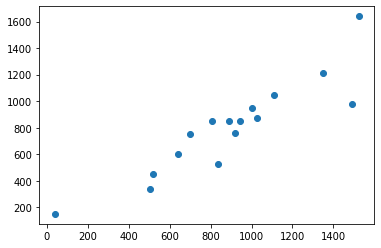

In [85]:
peso = [849, 850, 950, 1640, 150, 750, 600, 875, 975, 450, 1050, 335, 525, 850, 760, 1212]
volumen = [890, 805, 1001, 1525, 39, 701, 641, 1028, 1492, 519, 1110, 505, 834, 944, 920, 1350]
plt.scatter(volumen, peso)

{'boxes': [<matplotlib.lines.Line2D at 0x7f0559fae050>,
 'caps': [<matplotlib.lines.Line2D at 0x7f0559fb8110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f055a01c610>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0559fb8bd0>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0559fae650>,
  <matplotlib.lines.Line2D at 0x7f0559fc9210>]}

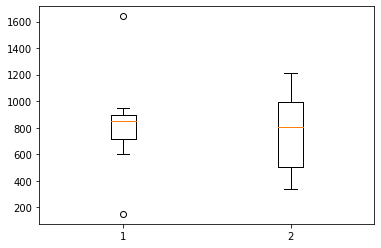

In [5]:
peso_duras = [849, 850, 950, 1640, 150, 750, 600, 875]
peso_blandas = [975, 450, 1050, 335, 525, 850, 760, 1212]
plt.boxplot([peso_duras, peso_blandas])

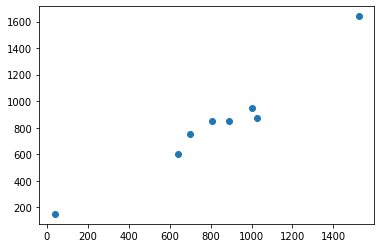

In [7]:
volumen_duras = [890, 805, 1001, 1525, 39, 701, 641, 1028]
volumen_blandas = [1492, 519, 1110, 505, 834, 944, 920, 1350]
plt.scatter(volumen_duras, peso_duras)


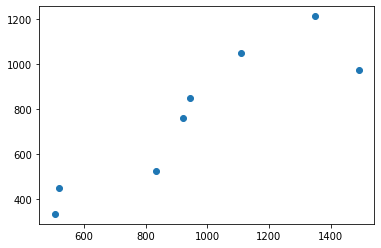

In [8]:
plt.scatter(volumen_blandas, peso_blandas)


In [13]:
# correlación
x = X["volumen"].values.reshape(-1,1)
# crear el modelo------------------------------------------------
lm1 = linear_model.LinearRegression()
lm1.fit(x, peso)
peso_pred = lm1.predict(x)
print("Coeficiente de det. R2: %.4f"
% r2_score(peso, peso_pred))
r = pow(0.8281, 0.5)
print("r = ",r)

Coeficiente de det. R2: 0.8281
r =  0.9099999999999999


In [14]:
import statsmodels.api as sm
from scipy import stats
# anyadir intercepto---------------------------------------------
X2 = sm.add_constant(X)
# ajustar el modelo----------------------------------------------
est = sm.OLS(peso, X2)
# ver ajuste-----------------------------------------------------
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     54.99
Date:                Tue, 07 Sep 2021   Prob (F-statistic):           4.53e-07
Time:                        21:12:46   Log-Likelihood:                -98.140
No. Observations:                  16   AIC:                             202.3
Df Residuals:                      13   BIC:                             204.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.8940     83.086      1.154      0.2

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [15]:
lm2 = linear_model.LinearRegression()
lm2.fit(X, peso)
peso_pred_2 = lm2.predict(X)
print("Coeficiente de det. R2: %.4f"
% r2_score(peso, peso_pred_2))

Coeficiente de det. R2: 0.8943
